This is the notebook for model in age gender dectector .here ,we will extract the data , train it and fit it into our model, and will evaluate our results optimize the model for better results.

## Import the Liberaries

In [2]:
import tensorflow as tf
# from cv2 import cv2
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
fldr="S:\\Null_class_intership\\archive\\UTKFace"

In [4]:
import os
files=os.listdir(fldr)

## Create List of images from the dataset

In [5]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


S:\Null_class_intership\archive\UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
S:\Null_class_intership\archive\UTKFace/101_1_2_2017

## Create List of Age & Gender from the dataset

In [55]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)


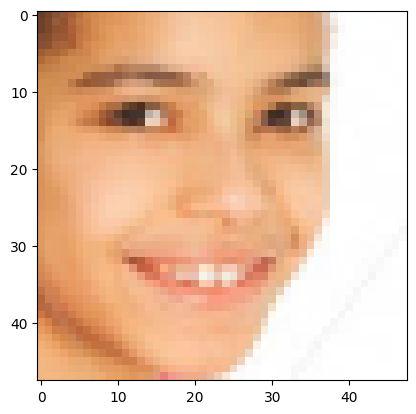

In [56]:
plt.imshow(images[88])

In [57]:
print(ages[88])

10


In [58]:
print(genders[88])

0


 ## Saving images array , ages array & gender array

In [59]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [60]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding the no. Male & Female Samples

In [61]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[24782 22634]


## Ploting the no of Mlae & Female Samples

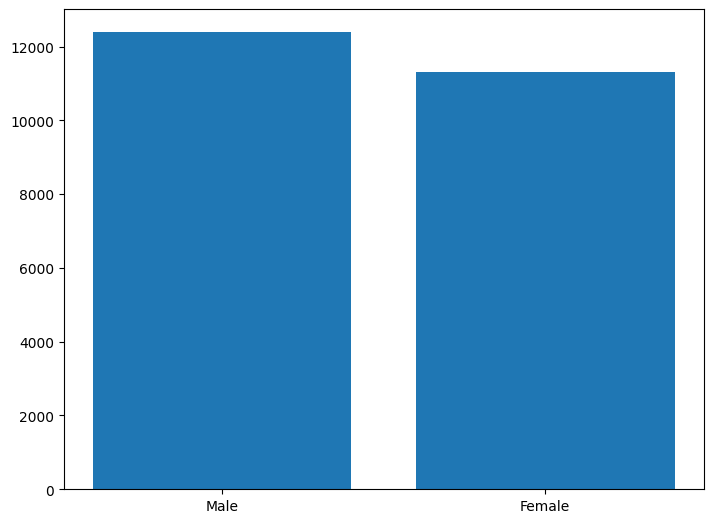

In [62]:
fig=plt.figure()
ax= fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding The no.of samples in each age 

In [63]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[2246  964  578  546  392  262  278  526  332  312  130  260  162  314
  354  494  316  524  196  568  692  790  852 1718 1468 4394 1230 1836
 1140 1448  700 1328  286  818 1760  966  586  650  532 1052  264  532
  314  200  880  306  340  306  296  762  276  464  482  706  536  472
  194  542  164  586  322  250  206  100  518  154  188  200  112  294
   66  196  126   64  296  116   56  138   46  266   44   80   36   48
  310   70   20   68   66  164    4   26   10   18   34   18   22    4
    2   10   10    2    6    8]


Converting Age Counts to Lists

In [64]:
val=values.tolist()
cnt=counts.tolist()

# Ploting Samples Agewise

TypeError: 'str' object is not callable

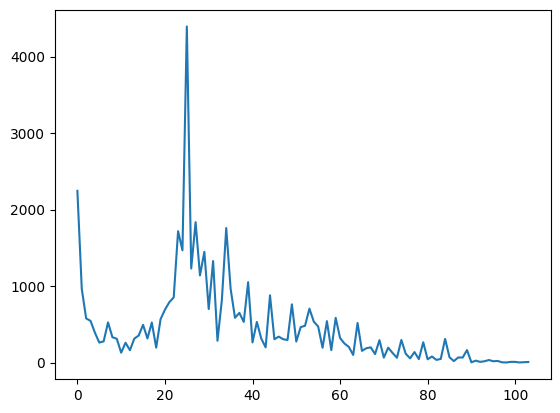

In [65]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defing the label for output

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


## Creating another list form existing one
### for batter learing

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

## Spliting data in Train & Test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[66,  0],
       [ 6,  0],
       [71,  1],
       [35,  1],
       [28,  1]])

# Spliting Y_train & Y_test for understanding

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[1][0:5]

array([66,  6, 71, 35, 28])

## Defining the Model

In [26]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x


In [27]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2) (dense_1)
    drop_2=Dropout(0.2) (dense_2)
    output_1=Dense(1,activation='sigmoid', name='sex_out') (drop_1)
    output_2=Dense(1,activation='relu', name='age_out') (drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    # model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=["accuracy"])
    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics={"sex_out": "accuracy", "age_out": "mae"})
    return model


In [28]:
Model=model((48,48,3))

In [29]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing The Model

In [31]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running The Model
#### This Will Take Some Time

In [32]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - age_out_mae: 17.1785 - loss: 18.1090 - sex_out_accuracy: 0.5162
Epoch 1: val_loss improved from inf to 16.49768, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 64s 197ms/step - age_out_mae: 17.1717 - loss: 18.1020 - sex_out_accuracy: 0.5163 - val_age_out_mae: 15.6838 - val_loss: 16.4977 - val_sex_out_accuracy: 0.7042
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - age_out_mae: 12.2424 - loss: 13.0685 - sex_out_accuracy: 0.6645
Epoch 2: val_loss improved from 16.49768 to 14.76826, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 50s 179ms/step - age_out_mae: 12.2404 - loss: 13.0664 - sex_out_accuracy: 0.6645 - val_age_out_mae: 13.9298 - val_loss: 14.7683 - val_sex_out_accuracy: 0.7300
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - age_out_mae: 10.2109 - loss: 11.0489 - sex_out_accuracy: 0.6898
Epoch 3: val_loss improved from 14.76826 to 12.50358, saving model to Age_Sex_

## Model Evaluation

In [33]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - age_out_mae: 6.3448 - loss: 7.5008 - sex_out_accuracy: 0.8823


[7.473446369171143, 6.323453426361084, 0.8842584490776062]

In [34]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


In [35]:
pred[1]

array([[52.843575 ],
       [ 3.2279162],
       [29.603447 ],
       ...,
       [ 9.380989 ],
       [ 4.1928997],
       [41.646782 ]], dtype=float32)

 ## Plotting Loss

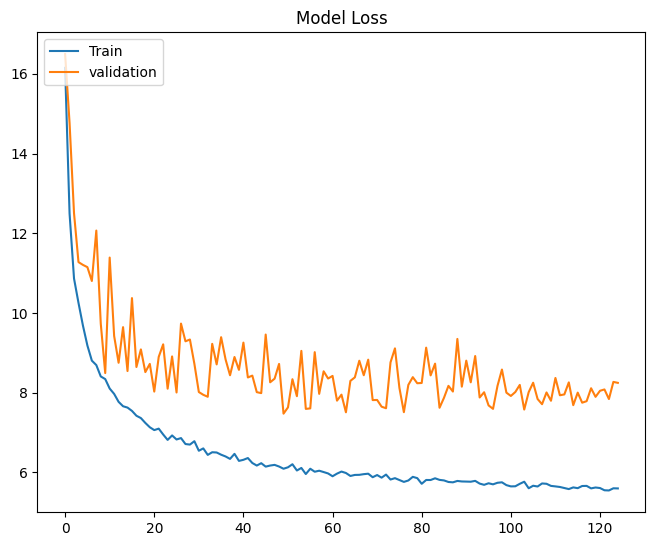

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Sex Accuracy

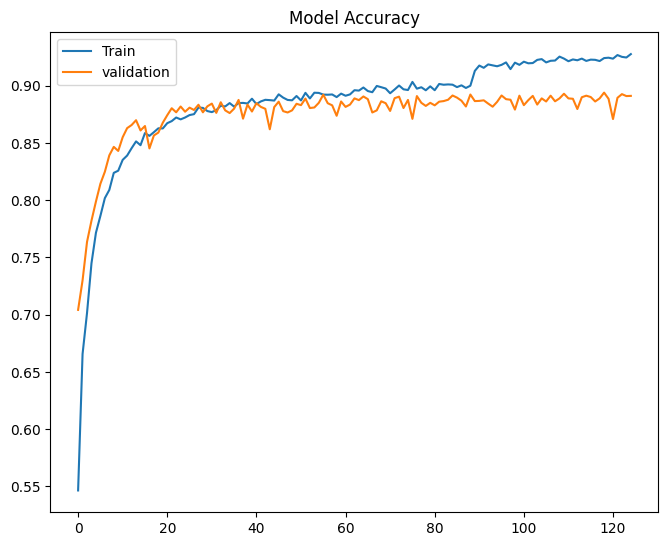

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

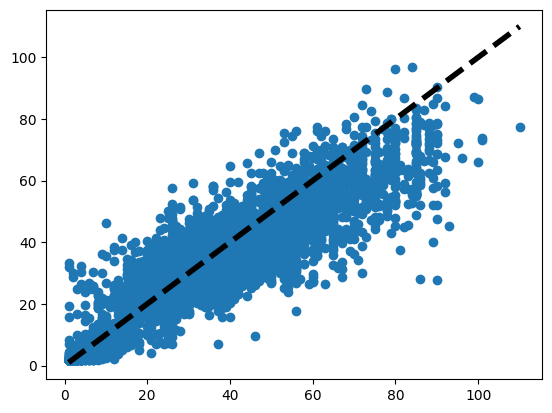

In [38]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()] ,'k--',lw=4)
ax.set_xlabel=('Actual Age')
ax.set_ylabel=('Predicted Age')
plt.show()

## Making  Report of Model [Gender Only]

In [39]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
report=classification_report(Y_test_2[0],Pred_l)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3136
           1       0.84      0.93      0.88      2791

    accuracy                           0.88      5927
   macro avg       0.89      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



## Making Heatmap of The Model [Gender Only]

In [43]:
results= confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

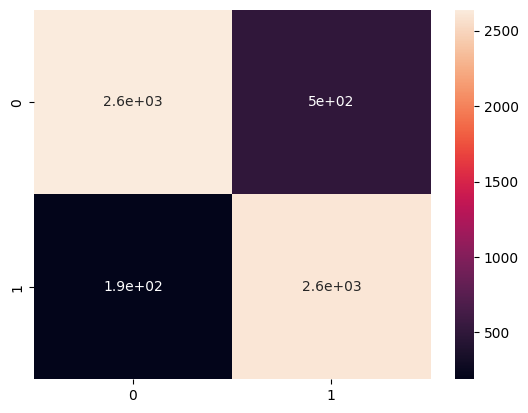

In [44]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [45]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted Age is", str(age))
    print("Predicted Gender is ",sex_f[sex])

### Test--- 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 85
Predicted Gender is  Female


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


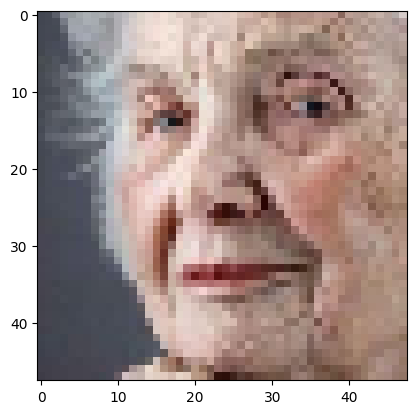

In [46]:
test_image(4,images_f,images_f_2,Model)

### Test--- 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 8
Predicted Gender is  Male


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


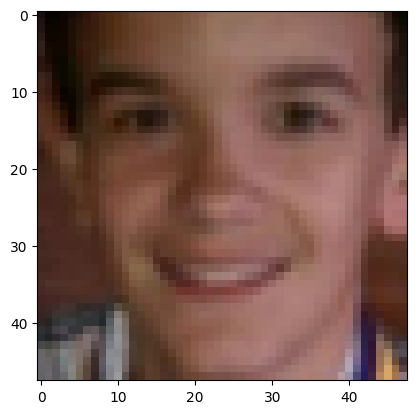

In [47]:
test_image(23,images_f,images_f_2,Model)

### Test--- 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Age is 7
Predicted Gender is  Female


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


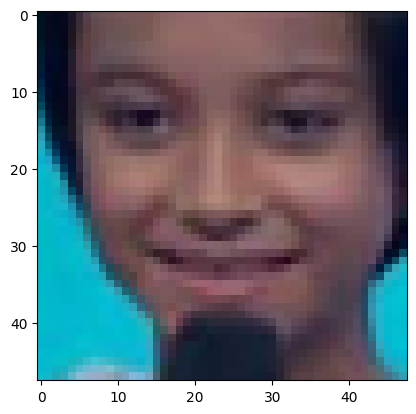

In [48]:
test_image(168,images_f,images_f_2,Model)

### Test--- 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Age is 21
Predicted Gender is  Male


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


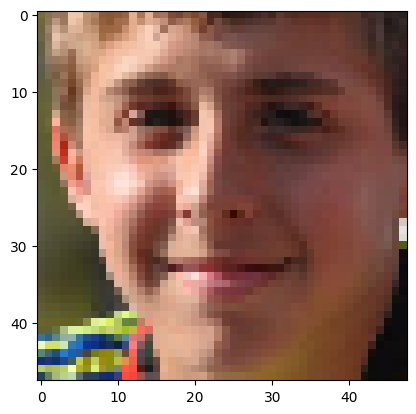

In [49]:
test_image(888,images_f,images_f_2,Model)

### Test--- 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Age is 25
Predicted Gender is  Female


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


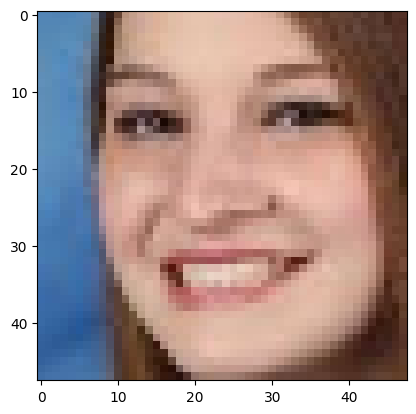

In [50]:
test_image(1288,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 23
Predicted Gender is  Male


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


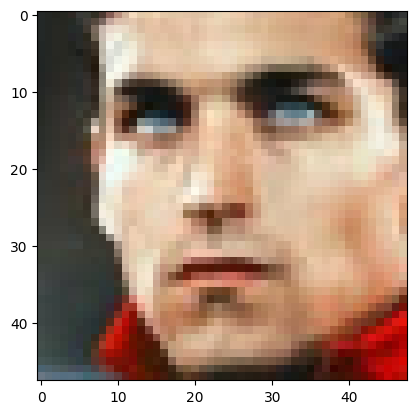

In [51]:
test_image(3000,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is 6
Predicted Gender is  Female


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


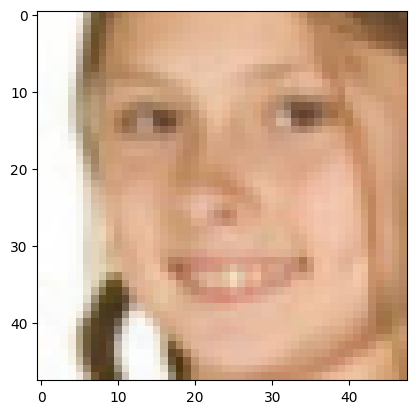

In [52]:
test_image(222,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Age is 78
Predicted Gender is  Female


C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
C:\Users\sujee\AppData\Local\Temp\ipykernel_16460\3033946328.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


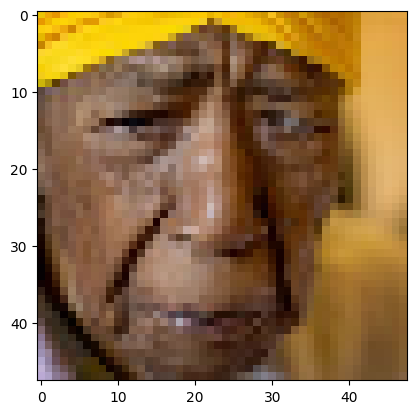

In [53]:
test_image(18,images_f,images_f_2,Model)